# Textmining

---

Group name: D

---


In [1]:
import pandas as pd 

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
df=pd.read_csv("~/Documents/GitHub/homework-1/data/raw/webscraping.csv")

In [4]:
df['Text'] = df['Text'].astype(str).str.lower()

df.head()

,Unnamed: 0,Text
0,0,"when roswell schaeffer sr. was 8 years old, hi..."
1,1,"now, nearly seven decades later, schaeffer is ..."
2,2,"in the 1980s, kotzebue sound’s beluga populati..."
3,3,but some scientists think that understanding h...
4,4,"cultural practices can become rote, however, a..."


In [8]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['Text_Token']=df['Text'].apply(regexp.tokenize)

df.head()

,Unnamed: 0,Text,Text_Token
0,0,"when roswell schaeffer sr. was 8 years old, hi...","[when, roswell, schaeffer, sr, was, 8, years, ..."
1,1,"now, nearly seven decades later, schaeffer is ...","[now, nearly, seven, decades, later, schaeffer..."
2,2,"in the 1980s, kotzebue sound’s beluga populati...","[in, the, 1980s, kotzebue, sound, s, beluga, p..."
3,3,but some scientists think that understanding h...,"[but, some, scientists, think, that, understan..."
4,4,"cultural practices can become rote, however, a...","[cultural, practices, can, become, rote, howev..."


In [9]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords

In [11]:
my_stopwords = ['when', 'but']

my_stopwords

['when', 'but']

In [14]:
df['Text_Token_1'] = df['Text_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])

df.head()

,Unnamed: 0,Text,Text_Token,Text_Token_1
0,0,"when roswell schaeffer sr. was 8 years old, hi...","[when, roswell, schaeffer, sr, was, 8, years, ...","[roswell, schaeffer, sr, was, 8, years, old, h..."
1,1,"now, nearly seven decades later, schaeffer is ...","[now, nearly, seven, decades, later, schaeffer...","[now, nearly, seven, decades, later, schaeffer..."
2,2,"in the 1980s, kotzebue sound’s beluga populati...","[in, the, 1980s, kotzebue, sound, s, beluga, p...","[in, the, 1980s, kotzebue, sound, s, beluga, p..."
3,3,but some scientists think that understanding h...,"[but, some, scientists, think, that, understan...","[some, scientists, think, that, understanding,..."
4,4,"cultural practices can become rote, however, a...","[cultural, practices, can, become, rote, howev...","[cultural, practices, can, become, rote, howev..."


In [16]:
df['Text_2'] = df['Text_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

df.head()

,Unnamed: 0,Text,Text_Token,Text_Token_1,Text_2
0,0,"when roswell schaeffer sr. was 8 years old, hi...","[when, roswell, schaeffer, sr, was, 8, years, ...","[roswell, schaeffer, sr, was, 8, years, old, h...",roswell schaeffer was years old his father dec...
1,1,"now, nearly seven decades later, schaeffer is ...","[now, nearly, seven, decades, later, schaeffer...","[now, nearly, seven, decades, later, schaeffer...",now nearly seven decades later schaeffer one o...
2,2,"in the 1980s, kotzebue sound’s beluga populati...","[in, the, 1980s, kotzebue, sound, s, beluga, p...","[in, the, 1980s, kotzebue, sound, s, beluga, p...",the 1980s kotzebue sound beluga population beg...
3,3,but some scientists think that understanding h...,"[but, some, scientists, think, that, understan...","[some, scientists, think, that, understanding,...",some scientists think that understanding how t...
4,4,"cultural practices can become rote, however, a...","[cultural, practices, can, become, rote, howev...","[cultural, practices, can, become, rote, howev...",cultural practices can become rote however and...


In [17]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
wordnet_lem = WordNetLemmatizer()

In [20]:
df['text_lem'] = df['Text_2'].apply(wordnet_lem.lemmatize)

In [22]:
check_difference = (df['text_lem'] == df['Text_2'])
check_difference.value_counts()

True    29
dtype: int64

In [23]:
all_words_articletext = ' '.join([i for i in df['text_lem']])

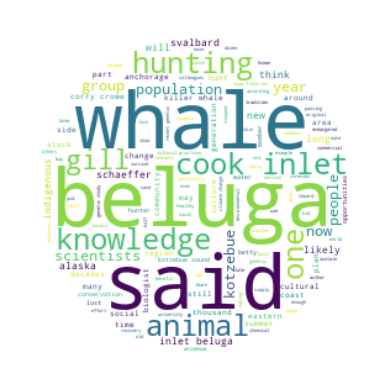

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) **2 + (y - 150) **2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletext)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [27]:
words_tokens = nltk.word_tokenize(all_words_articletext)

In [28]:
fd = FreqDist(words_tokens)
fd

FreqDist({'the': 140, 'and': 63, 'belugas': 43, 'that': 43, 'whales': 24, 'are': 24, 'they': 22, 'said': 21, 'for': 20, 'from': 19, ...})

In [29]:
top_4 = fd.most_common(n=4)
top_4

[('the', 140), ('and', 63), ('belugas', 43), ('that', 43)]

In [30]:
fd.tabulate(4)

    the     and belugas    that 
    140      63      43      43 


In [31]:
top_10 = fd.most_common(10)

top_10

[('the', 140),
 ('and', 63),
 ('belugas', 43),
 ('that', 43),
 ('whales', 24),
 ('are', 24),
 ('they', 22),
 ('said', 21),
 ('for', 20),
 ('from', 19)]

In [33]:
df_frequence = pd.DataFrame({"frequency": dict(top_10)})

df_frequence

,frequency
and,63
are,24
belugas,43
for,20
from,19
said,21
that,43
the,140
they,22
whales,24


In [34]:
df_frequence.reset_index(inplace=True)

df_frequence

,index,frequency
0,and,63
1,are,24
2,belugas,43
3,for,20
4,from,19
5,said,21
6,that,43
7,the,140
8,they,22
9,whales,24


In [39]:
import altair as alt 
alt.Chart(df_frequence).mark_bar().encode(
    x = alt.X("frequency"),
    y = alt.Y("index", sort = "-x")
)

alt.Chart(...)